## **IMPORT LIBRARIES**

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)          
import matplotlib.pyplot as plt # visualization
# plt.rcParams.update({'font.size': 14})
import seaborn as sns # visualization
import math 
import warnings # Supress warnings 
warnings.filterwarnings('ignore')
from keras.models import Sequential 
from keras.layers import Activation, Dense , Concatenate,BatchNormalization  

In [2]:
import keras
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU
import tensorflow 
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import argparse
import imutils
import cv2
import os

import numpy as np
from numpy import asarray
from sklearn.preprocessing import StandardScaler

## **READING THE DATA**

In [32]:
test_drive_df= pd.read_csv('/home/ahmed/queens_project/final_project/full_data.csv' ) 

In [18]:
test_drive_df.head()

,Rec_Lat,Rec_Long,RSRP,serving_Lat,serving_Long,distance,Bearing_angle,PL
0,30.01471,31.45804,-66.5625,30.010772,31.456667,0.456179,-163.196082,121.064588
1,30.01472,31.45804,-66.5625,30.010772,31.456667,0.457239,-163.236257,121.099297
2,30.01472,31.45805,-66.5625,30.010772,31.456667,0.457520,-163.121105,121.108460
3,30.01472,31.45806,-66.8125,30.010772,31.456667,0.457802,-163.006094,121.117678
4,30.01472,31.45807,-67.3125,30.010772,31.456667,0.458086,-162.891224,121.126951


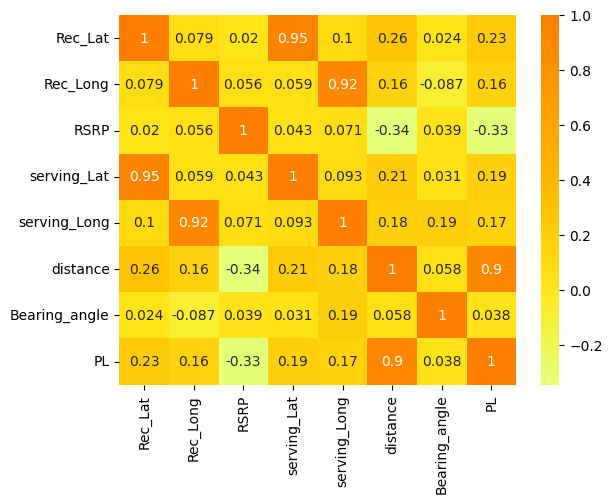

In [19]:
# correlation plot
corr = test_drive_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [20]:
test_drive_df.isnull().sum()

Rec_Lat          0
Rec_Long         0
RSRP             0
serving_Lat      0
serving_Long     0
distance         0
Bearing_angle    0
PL               0
dtype: int64

## **Split Dataset**

In [21]:
y= test_drive_df['RSRP']
x=test_drive_df.drop(columns="RSRP")

In [22]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(scaled, y, test_size = 0.25, random_state = 10)

In [24]:
train_X.shape , val_X.shape , train_y.shape , val_y.shape  # type: ignoree

((64733, 7), (21578, 7), (64733,), (21578,))

# **Numerical Model**

In [25]:
y_size,x_size = test_drive_df.shape

In [26]:
model = Sequential()
model.add(Dense(x_size,activation='relu')) # x_size - 64 - 64 - 128 - 64 - 64 - x_size
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1)) # since we want only one feature as outcome (price) I added 1 as last dense

In [27]:
model.compile(optimizer='adam',loss='mae') #optimizer is adam and loss f is mean absolute error

In [28]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0) and (logs.get('val_loss')<0):
            print('\n reached enough loss so stopping training') # to stop my model I used a custom callback
            self.model.stop_training = True
callbacks = myCallback() # callback olarak bu class tanımlandı

In [29]:
history = model.fit(
    x= train_X,
    y= train_y,
    batch_size=128,
    epochs=250,
    validation_data=(val_X, val_y),
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ])
# I used 400 epochs (if you want you can change the number of epochs or you can edit the callback above)

Epoch 1/250
506/506 [==============================] - 4s 6ms/step - loss: 13.3737 - val_loss: 6.6424 - lr: 0.0010
Epoch 2/250
506/506 [==============================] - 2s 5ms/step - loss: 6.5320 - val_loss: 6.6032 - lr: 0.0010
Epoch 3/250
506/506 [==============================] - 3s 5ms/step - loss: 6.2875 - val_loss: 6.0246 - lr: 0.0010
Epoch 4/250
506/506 [==============================] - 2s 5ms/step - loss: 6.1572 - val_loss: 5.8698 - lr: 0.0010
Epoch 5/250
506/506 [==============================] - 3s 5ms/step - loss: 5.9685 - val_loss: 5.7807 - lr: 0.0010
Epoch 6/250
506/506 [==============================] - 2s 5ms/step - loss: 5.7792 - val_loss: 5.5473 - lr: 0.0010
Epoch 7/250
506/506 [==============================] - 3s 5ms/step - loss: 5.6239 - val_loss: 5.4237 - lr: 0.0010
Epoch 8/250
506/506 [==============================] - 2s 5ms/step - loss: 5.5465 - val_loss: 5.2824 - lr: 0.0010
Epoch 9/250
506/506 [==============================] - 3s 5ms/step - loss: 5.3657 - val

In [30]:
model.save("Num_Model_w_Scale.h5")